In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [11]:
titanic_data = pd.read_csv('/content/drive/MyDrive/praktikum_ml/praktikum09/data/tested.csv')

In [66]:
titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34.5,0,0,7.8292,2
1,1,3,1,47.0,1,0,7.0000,0
2,0,2,0,62.0,0,0,9.6875,2
3,0,3,0,27.0,0,0,8.6625,0
4,1,3,1,22.0,1,1,12.2875,0


In [13]:
titanic_data.tail ()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [14]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [15]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [16]:
titanic_data = titanic_data.drop(columns=['PassengerId','Cabin','Name', 'Ticket'], axis=1)

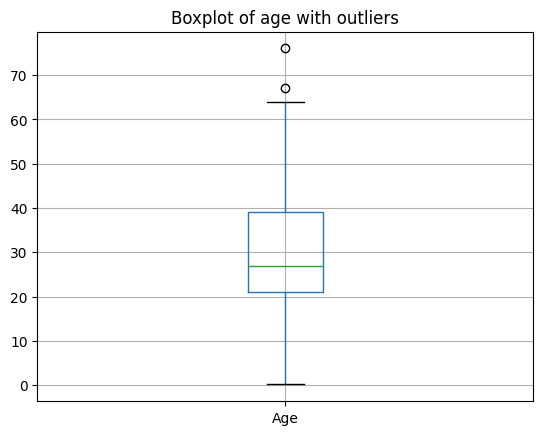

In [17]:
titanic_data.boxplot(column=['Age'])
plt.title("Boxplot of age with outliers")
plt.show()

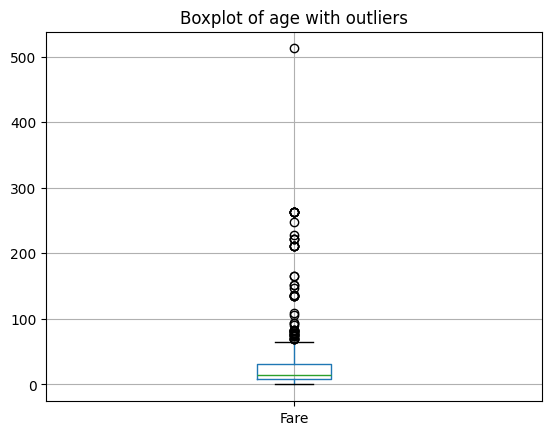

In [18]:
titanic_data.boxplot(column=['Fare'])
plt.title("Boxplot of age with outliers")
plt.show()

In [19]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

/tmp/ipython-input-423417795.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
/tmp/ipython-input-423417795.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [20]:
titanic_data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [21]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,29.599282,0.447368,0.392344,35.576535
std,0.481622,0.841838,12.703770,0.896760,0.981429,55.850103
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [22]:
titanic_data['Survived'].value_counts()

,count
Survived,
0,266
1,152


In [23]:
titanic_data['Sex'].value_counts()

,count
Sex,
male,266
female,152


In [24]:
titanic_data['Pclass'].value_counts()

,count
Pclass,
3,218
1,107
2,93


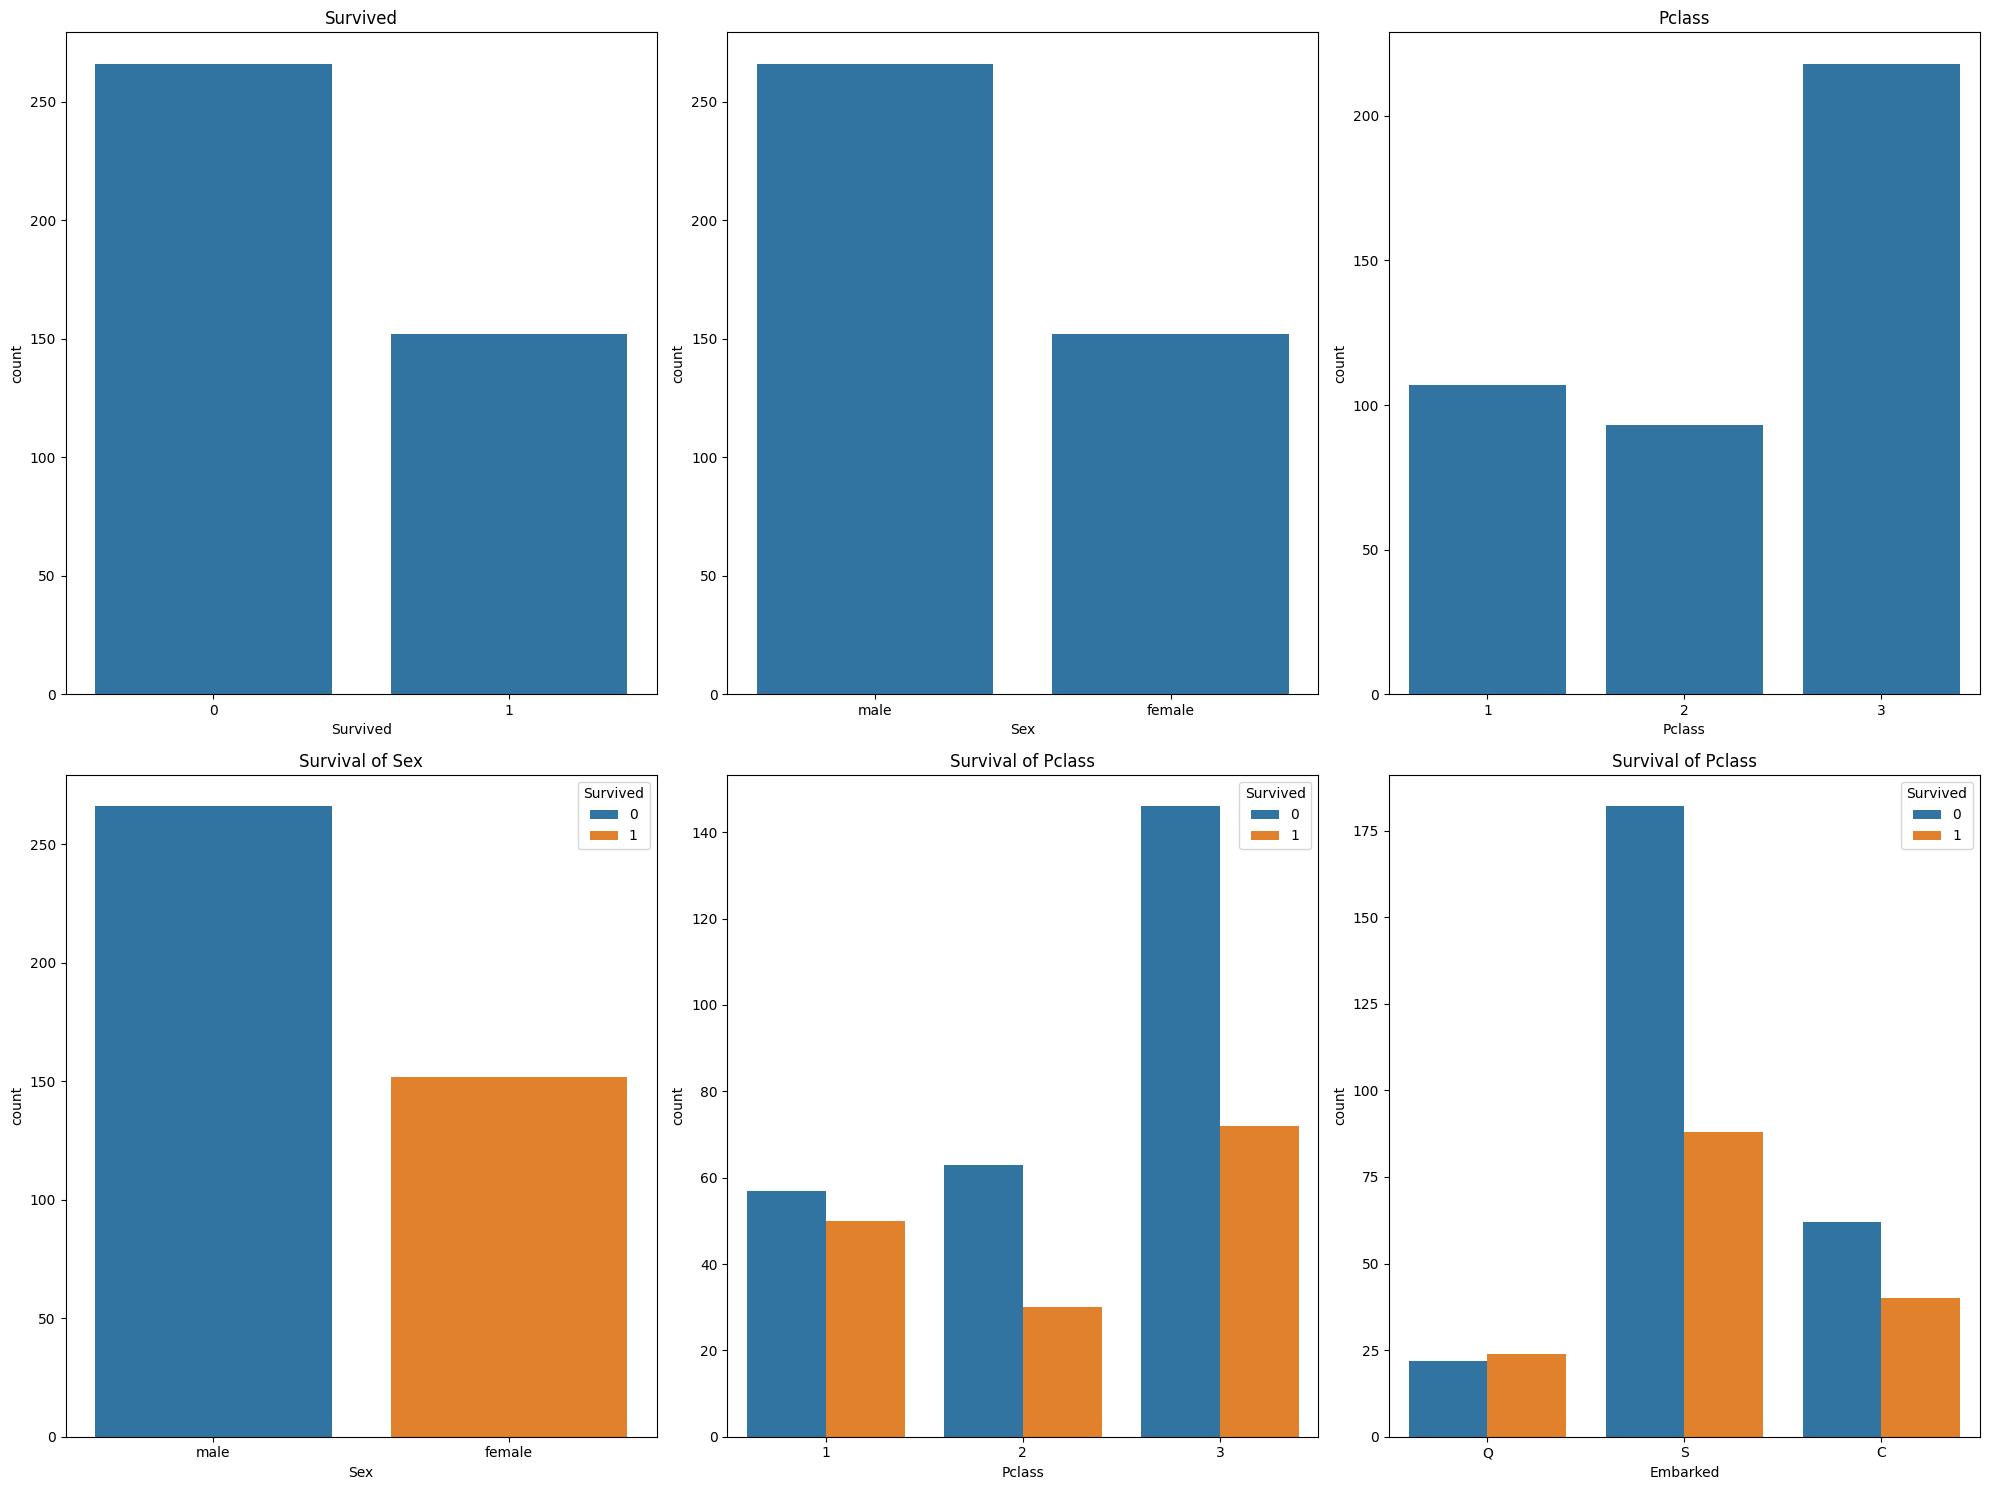

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

axes = axes.flatten()

sns.countplot(x='Survived', data=titanic_data, ax=axes[0])
axes[0].set_title('Survived')


sns.countplot(x='Sex', data=titanic_data, ax=axes[1])
axes[2].set_title('Sex')


sns.countplot(x='Pclass', data=titanic_data, ax=axes[2])
axes[2].set_title('Pclass')

sns.countplot(x='Sex', hue='Survived', data=titanic_data, ax=axes[3])
axes[3].set_title('Survival of Sex')

sns.countplot(x='Pclass', hue='Survived', data=titanic_data, ax=axes[4])
axes[4].set_title('Survival of Pclass')

sns.countplot(x='Embarked', hue='Survived', data=titanic_data, ax=axes[5])
axes[5].set_title('Survival of Pclass')

plt.tight_layout()
plt.show()

In [49]:
titanic_data['Sex'] = titanic_data['Sex'].astype(str).str.strip().str.lower()
titanic_data['Embarked'] = titanic_data['Embarked'].astype(str).str.strip().str.upper()


In [51]:
replacement = {
    'Sex' : {'male' : 0, 'female' : 1},
    'Embarked' : {'S' : 0, 'C' : 1, 'Q' : 2}
}
titanic_data.replace(replacement, inplace=True)

In [52]:
X = titanic_data.drop(columns=['Survived'], axis=1)
Y = titanic_data['Survived']

In [53]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [54]:
Y.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=42)

In [56]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


In [57]:
titanic_data['Sex'].unique()
titanic_data['Embarked'].unique()

array(['2', '0', '1'], dtype=object)

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, Y_train)

GaussianNB()

In [60]:
## accuracy
train_pred_nb = nb_model.predict(X_train_scaled)
test_pred_nb = nb_model.predict(X_test_scaled)

In [61]:
print("Training Accuracy (NB): ", accuracy_score(Y_train, train_pred_nb))
print("Testing Accuracy (NB): ", accuracy_score(Y_test, test_pred_nb))

Training Accuracy (NB):  1.0
Testing Accuracy (NB):  1.0


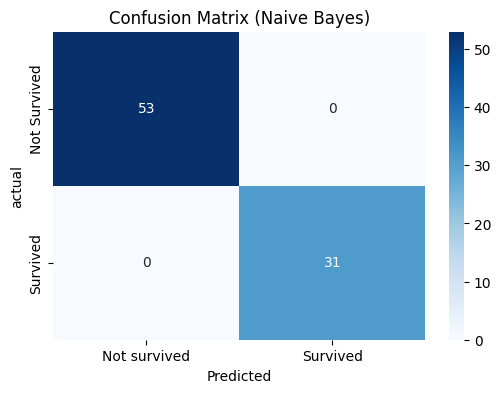

In [62]:
##visualisasi Confusion matrix (naive bayes)

plt.figure(figsize=(6,4))
cm_nb = confusion_matrix(Y_test, test_pred_nb)

sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])

plt.title("Confusion Matrix (Naive Bayes)")
plt.xlabel("Predicted")
plt.ylabel("actual")
plt.show()

In [63]:
print("\nClassification Report (NB): ")
print(classification_report(Y_test, test_pred_nb))


Classification Report (NB): 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [64]:
from sklearn.model_selection import cross_val_score
cv_nb = cross_val_score(nb_model, X, Y, cv=5, scoring='accuracy')
print("\nNaive Bayes Cross Validation Accuracy (5-Fold):")
print("Scores:", cv_nb)
print("Mean Accuracy:", cv_nb.mean())
print("Std Deviation:", cv_nb.std())


Naive Bayes Cross Validation Accuracy (5-Fold):
Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Std Deviation: 0.0
